In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib 
#from scipy.integrate import odeint  # integrator
#from scipy import interpolate

from matplotlib.patches import Ellipse
from matplotlib.patches import Polygon

twopi = 2.0*np.pi

In [3]:
# http://subsurfwiki.org/wiki/Young%27s_modulus

In [2]:
# rotation, tgrav
G = 6.67e-8 # cgs
GM = 5.2e6 # in cgs, from 5.2 m3/s2  from scheeres
rhoa = 1.26  # cgs from scheeres
Ra = 246.0e2  # now in cm  Bennu's mean equatorial radius, scheeres
tgrav = np.sqrt(3.0/(4.0*np.pi*G*rhoa))
print ("tgrav=",tgrav, "s")
P_rot = 4.2978*60.0*60.0 # hours to s period from nolan+13
omega_rot  = 2.0*np.pi/P_rot
om = omega_rot*tgrav
print("om unitless", om)
print("Pt unitless",P_rot/tgrav)
print("omega_rot ",omega_rot, "s-1")

tgrav= 1685.41752664 s
om unitless 0.684445183829
Pt unitless 9.17996861637
omega_rot  0.0004060982949402786 s-1


In [5]:
#density in nbody units
rhobar = 3.0/(4.0*np.pi)
print("rhobar ", rhobar)

rhobar  0.238732414637843


In [6]:
# nbody speed and frequency associated with V_p
Ra = 246.  # m   equatorial radius of Bennu
speed = Ra/tgrav   # in cm/s, this is Nbody speed
print("N-body speed Rv/tgrav ", speed, "m/s")
pwave = 104.0 # velocity m/s from Cooper+74
print("ratio Vp/Nbodyspeed ", pwave/speed) 
om_0 = pwave/Ra
print("fchar = Vp/Ra frequency ", om_0, " Hz")
print("fchar unitless", om_0*tgrav)
print("1/om0 unitless ", 1.0/(om_0*tgrav))  # timestep has to be much less than this to do fourier transforms

N-body speed Rv/tgrav  0.145957898332 m/s
ravio VP/Nbodyspeed  712.534238903
om0 = VP/Ra frequency  0.42276422764227645  Hz
om0 unitless 712.534238903
1/om0 unitless  0.00140344133012


In [7]:
# Rayleigh wave speed ratio and S wave speed ratios
nu = 0.25
VR_Vs = (0.862 + 1.14*nu)/(1+nu)  # approximation
print("ratio V_Ra/V_S ", VR_Vs)
#L. B. Freund (1998). Dynamic Fracture Mechanics. Cambridge University Press. p. 83.
# from https://en.wikipedia.org/wiki/Rayleigh_wave
Vp_Vs = np.sqrt((2*nu-2)/(2*nu-1))
Vp_Vs2 = ((2*nu-2)/(2*nu-1))
VR_Vp = VR_Vs/Vp_Vs
print("ratio VpVs and square" , Vp_Vs, Vp_Vs2)
print("ratio VRaVp " , VR_Vp)
print("ratio Vs/Nbodyspeed ", (pwave/speed)/Vp_Vs)
print("ratio VRa/Nbodyspeed ", (pwave/speed)*VR_Vs/Vp_Vs)

ratio V_R/V_S  0.9176
ratio VpVs and square 1.73205080757 3.0
ratio VRVp  0.529776607008
ratio Vs/Nbodyspeed  411.381834638
ratio VR/Nbodyspeed  377.483971463


In [8]:
# eg for Bennu
GM = 5.2 # in mks, from scheeres
G = 6.67e-11 # mks
M = GM/G # in kg
print ("M=", M/1e10, "e10 kg")
Ra = 246.  # m  equatorial radius Bennu
eg = G*M**2/Ra**4
print("eg=", eg, "Pa")
# check density
rho_check = M*3/(4*np.pi*Ra**3)
print("rho check " , rho_check, " kg m-3")
Vgrav = np.sqrt(GM/Ra)
print("Vgrav check ", Vgrav, "m/s")

M= 7.796101949025489 e10 kg
eg= 110.69816579785817 Pa
rho check  1250.2117581842556  kg m-3
Vgrav check  0.14538985997 m/s


In [9]:
# E/eg
nu = 0.25  # from our mass spring model, Poisson ratio
fac = (1.0-nu)/((1+nu)*(1-2*nu))  # is 6/5
pwave = 104.0 # velocity m/s from Cooper+74
rhoa = 1260.0  # density mks from scheeres
E = pwave**2*rhoa/fac  # youngs modulus
print("E=", E, "Pa   ", E/1e6, "MPa")
print("ratio E/eg =",  E/eg/1e5, "e5 ")

#check Pwave speed
rhobar = 3.0/(4.0*np.pi)
vp_check = np.sqrt(1e5/rhobar)*np.sqrt(6.0/5.0)
print("V_p check ", vp_check)  # close enough to 712

E= 11356800.0 Pa    11.3568 MPa
ratio E/eg = 1.0259248577558397 e5 
V_p check  708.981540362


In [10]:
# compute radius of equivalent volume using GM value from Scheeres!
GM = 5.2 # in mks, from scheeres
G = 6.67e-11 # mks
M = GM/G # in kg
rhoa = 1260.0  # mks from scheeres

print("mass ", M, 'kg, '  , M/1e10, 'e10 kg')
f43 = 4.0*np.pi/3.0
RV = (M/f43/rhoa)**0.333333
print("volumetric radius", RV, "m ")  # volumetric radius

mass  77961019490.25488 kg,  7.796101949025489 e10 kg
volumetric radius 245.35998059479147 m 


In [11]:
# relevant for computing V_p in units of Nbody speed
# see http://subsurfwiki.org/wiki/Young%27s_modulus  for Vp vs E, nu
# V_p^2 = (E/\rho)(1-\nu)/( (1+ nu)(1-2nu))
nu = 0.25
fac = (1-nu)/((1+nu)*(1-2*nu))
print(np.sqrt(fac))
print(np.sqrt(6.0/5.0))


1.09544511501
1.09544511501


In [12]:
# checking equations in paper! ?
epsilon = 1e-5
x = 1.6*epsilon**-(1.0/3.0)*np.pi
print(x)
rho = 3.0/(4.0*np.pi)
y = 8.0*np.pi**2*0.384/rho/epsilon
tt = y**(1.0/3.0)
print(tt)
print((8.0*np.pi**2*0.384)**(1.0/3.0))


233.31170209059715
233.3117020905971
3.118221671776603


In [44]:

#  important!
# lets get taus in units of tgrav and Fs in gravitational units for simulations
Rproj = 2. # m  projectile radius
Ra = 246. # m equatoral 
Vp = 104. # m/s  # Pwave speed
GM = 5.2 # in mks, from scheeres
rhoprhoa=1.0
Vgrav = np.sqrt(GM/Ra);  print("Vgrav ", Vgrav, "m/s")
tgrav = np.sqrt(Ra**3/GM); print("tgrav ", tgrav, "s")
Vproj = 5e3   # m/s from 5 km/s projectile velocity
Sparm=1.0  # seismic amplification factor
epss = 1e-5  # seismic efficiency
print("Vp_Vgrav ", Vp/Vgrav)
print("Vproj_Vgrav ", Vproj/Vgrav)
print("Vgrav ", Vgrav)

fchar = Vp/Ra;   print("fchar * tgrav ", fchar*tgrav, ", fchar Hz ", fchar)
taus_fchar = 5.0*Sparm**(2.0/3.0)*epss**(-1.0/3.0)*(Rproj/Ra) *rhoprhoa**0.33333 
print("taus*fchar " , taus_fchar)

print("")
print("For simulation:  taus /tgrav " , taus_fchar/fchar/tgrav)

# lets get force in units of nbody force
Fs_ratio = 0.2*(epss*Sparm)**(1.0/3.0)*(Rproj/Ra)**2* (Vp*Vproj/Vgrav**2)*rhoprhoa**0.66667
print("For simulation:  Fs_ratio ",Fs_ratio)

Es_ratio = 0.5*0.2**3*Sparm**-2*epss**2*(Vproj/Vgrav)**2*taus_fchar**3
print("For simulation:  Es_ratio ",Es_ratio)


# source size!
Theta_c = (30*Rproj/Ra)*180.0/np.pi
print("For simulation:  Theta_c (deg) ", Theta_c)


Vgrav  0.14538985997 m/s
tgrav  1692.00245499 s
Vp_Vgrav  715.318111053
Vproj_Vgrav  34390.2938006
Vgrav  0.14538985997
fchar * tgrav  715.318111053 , fchar Hz  0.42276422764227645
taus*fchar  1.8868247291108855

For simulation:  taus /tgrav  0.00263774214571
For simulation:  Fs_ratio  7.0062916749
For simulation:  Es_ratio  0.00317779913259
For simulation:  Theta_c (deg)  13.974580369044467


In [47]:
print(np.sqrt(0.003/2))

0.0387298334621


In [17]:
Dp = 1.0 #m diameter of impactor
tau_s = np.pi*0.8*S**0.66667*epsilon**-0.33333*Dp/pwave # in our draft but based on
# equation 5 by Longonne+09
print(tau_s, "s")
print(1.0/tau_s, "Hz")
# and again we find that 1m is needed to get near the 1 Hz regime
# where low order normal modes are excited

1.121647829783392 s
0.8915454329306872 Hz


In [18]:
# equation 5 by richardson05
f = 2.0 # Hz
Dp3 =  G**2* rhoa**2*Da**5/(9*epsilon*vp**2*f**2)
Dp = Dp**0.33333
print(Dp, "cm")  # in cm

1.0 cm


In [19]:
# catastrophic disruption for this sizescale is about Q_D = 10^6 erg/g
# benz & Asphaug99
QD = 1e6 # erg/g
Ra = 246e2  # now in cm  Bennu's mean radius
Da = 2*Ra
Dp = Da*(2*QD)**0.33333/vp**0.666667  # times density ratio to 1/3
print(Dp, "cm")
print(Dp/100, "m")


21198.551929624147 cm
211.98551929624148 m


In [20]:
print((2*QD)**0.33333/vp**0.666667 ) 

0.43086487661837697


In [21]:
# so we are doing good!   We can hit it with something big enough to 
# very much resurface it, while not disrupting it to 50%
# the scenario basically works
# furthermore subsequent vibrational excitation can enhance vibrational structure

In [22]:
# n=0 modes
for l in range(1,6):
    f=np.sqrt(l*(l+1))*0.53/twopi
    print("l=",l," f=",f, " 712f=", 712*f)
# these are l modes with n=0 in units of vp/R
# these are 0f1 0f2 0f3 0f4

l= 1  f= 0.119291911891  712f= 84.9358412663
l= 2  f= 0.206619652327  712f= 147.113192457
l= 3  f= 0.292204314574  712f= 208.049471976
l= 4  f= 0.377234148011  712f= 268.590713384
l= 5  f= 0.46201558809  712f= 328.95509872


In [23]:
# roots! of f(x) below for radial modes, l=0
x=np.zeros(5)  # roots found using wolfram alpha
# FindRoot[-x^(-1) + (3 x)/4 + Cot[x] == 0
x[0]=2.563
x[1]=6.059
x[2]=9.280
x[3]=12.459
x[4]=15.622
ff = x/twopi
print(ff)  # these are the radial frequencies in units of vp/R
# these are 0f0 1f0 2f0 3f0 4f0 
print(ff*712)

[ 0.40791412  0.9643198   1.47695787  1.98291144  2.48631852]
[  290.43485283   686.59569774  1051.59400479  1411.83294242  1770.25878694]


In [24]:
def f(x):
    y = -1/x + 3*x/4 + 1/np.tan(x)
    return y


(-0.1, 10)

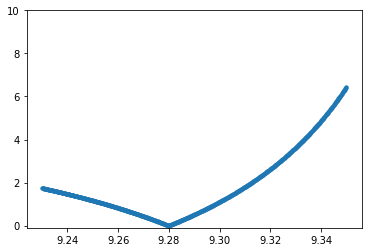

In [25]:
xarr = np.linspace(9.23,9.35,1000)
y = np.abs(f(xarr))
plt.plot(xarr,y,'.')
plt.ylim([-0.1,10])

(-0.1, 10)

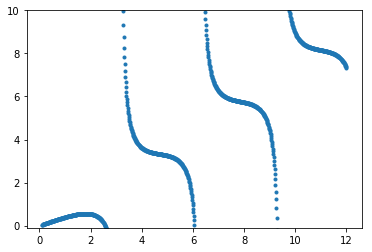

In [26]:
xarr = np.linspace(0.1,12,1000)
y = (f(xarr))
plt.plot(xarr,y,'.')
plt.ylim([-0.1,10])

In [25]:
print(np.sqrt(1e7))

3162.27766017


In [5]:
# making loglines figures
G = 6.67e-11 # mks
rho_a = 2000.0 # kg m-3 asteroid density
rho_p = rho_a  # projectile density
vproj = 5000.0  # m/s  projectile velocity
vproj_cgs = vproj*100
vp = 100.  # m/s regolith
vp_kms = vp/1e3  # vp in km/s
eta5 = 1e-5  # seismic efficiency
eta4 = 1e-4  # seismic efficiency
#Diameter Dp of projectile that can cause accelerations equal to surface accelerations
Q_disp = 2000.0
K_S = 0.2 *1e6   # 0.25 km^2/s  converted to m^2/s  diffusion coeff used by Richardson+05
Sparm = 1.0 # seismic amplification factor

# catastrophic disruption parameters 
Q0 = 9e7 # basalt 5kms encounter cgs  from Table III benz+99
Brho = 0.5*rho_a/1e3  # cgs, from Table III benz+99 (note second number is rho! in cgs)
aexp = -0.36; bexp=1.36  #exponents Table ? benz+99
Q0 = 1.0e9  # pumice 5kms encounter cgs from Table 3 jutzi10 JMBR10
aexp = -0.45; bexp=1.22  #exponents Table 3 JMBR10
Brho = 5.70*rho_a/1e3 # table 3 JMBR10 cgs is B*rho(cgs)


minDa = 2.0  # asteroid  mininum diameter in m
maxDa = 300.0e3 # max
Da_fine = np.logspace(np.log10(minDa), np.log10(maxDa),301,base=10)  # asteroid diameter in m
Da_course = np.logspace(np.log10(minDa), np.log10(maxDa),31,base=10)  # asteroid diameter in m

Dakm_fine = Da_fine/1e3  # in km
Dacm_fine = Da_fine*100  # in cm
Dakm_course = Da_course/1e3  # in km

#Vp = 0.1 # km/s is the same as 100 m/s which is a slow p regolith moon velocity

# global seismicity
# these are equation 7 by Richardson+05
# exponential is equation 15 Richardson+05 but with a factor of 3 to correct it
scalefac = 2.0*np.pi/(K_S*np.pi**2*Q_disp*3)
freq = 1.0 # Hz
Dp_f1_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3  # now in km
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f1_km *= expfac

freq = 10.0 # Hz
Dp_f10_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f10_km *= expfac
          
freq = 100.0 # Hz
Dp_f100_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f100_km *= expfac

#  replacing f with tau_s and our scaling we get this
Dp_tau_km_5 = 0.7*rho_a**2*G*G*eta5**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3  # times S**1.3333
Dp_tau_km_4 = 0.7*rho_a**2*G*G*eta4**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3

# replacing f with corner frequency
Dp_corner_km = G*rho_a*Da_fine**3/(vproj*vp) * np.sqrt(1.6667/eta5)/1e3

# catastrophic disruption
rcm = Dacm_fine/2.0 # radius rcm in cm of asteroid
QDstar = Q0*(rcm)**aexp + Brho*(rcm)**bexp # equation 6 by benz+asphaug99 with coefficients in Table III
# taking 5kms basalt line
# units erg/g  is the same as (cm/s)^2
massratio = QDstar/vproj_cgs**2   # v_proj = 5kms in cgs, ignoring density ratio
diamratio = massratio**(1.0/3.0)
diam_disrupt_cm = diamratio*2*rcm
diam_disrupt_km = diam_disrupt_cm/1e5

# why do I compute this and where is this from?
#itaus = 2.0*vp/Da*(rho_a/rho_p)**0.3333*eta**0.3333  # times S^-0.66667  # is a frequency
#tttaus = 1.0/itaus


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp


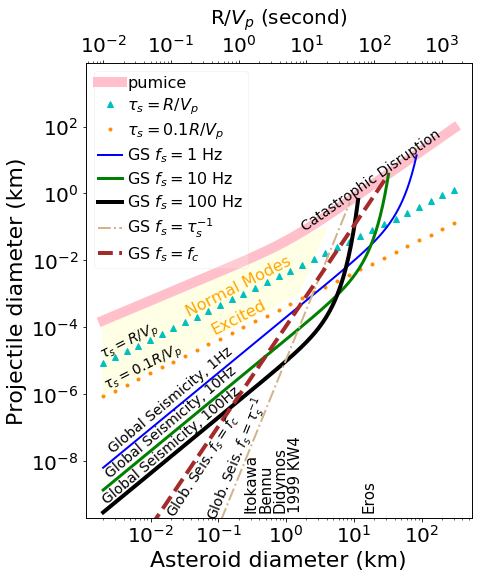

In [6]:

fig,axarr =  plt.subplots(1,1, figsize=(8,8))
plt.subplots_adjust(left=0.18, right=0.85, top=0.90, bottom=0.11) 
    
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_xlabel(r'Asteroid diameter (km)',fontsize=22)
axarr.set_ylabel(r'Projectile diameter (km)',fontsize=22)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# yellow region
coords = ([0.002,1e-6], [1.5,1e-3], [4.0,1e-1], [0.002,1e-4])
p = Polygon(coords, alpha=.1, fill=True, color='yellow')
axarr.add_artist(p)

# catastrophic disruption line
axarr.plot(Dakm_fine,diam_disrupt_km,'-',label='pumice', linewidth=10.0, color='pink')

ytxt = np.min(Dp_f100_km)
axarr.text(0.3,ytxt,'Itokawa',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.5,ytxt,'Bennu',fontsize=15,rotation=90,va='bottom',ha='center')  # vol equivalent diameters in km
axarr.text(17.0,ytxt,'Eros',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.8,ytxt,'Didymos',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(1.4,ytxt,'1999 KW4',fontsize=15,rotation=90,va='bottom',ha='center')


# a line that gives source frequency about 1 in units of R/V_p so 
# a seismic spectrum that peaks near low frequency normal modes
Dpnormal = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333
axarr.plot(Dakm_course,Dpnormal,'c^', label=r'$\tau_s=R/V_p$')
Dpnormal_small = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333*0.1
axarr.plot(Dakm_course,Dpnormal_small,'o', color='darkorange',label=r'$\tau_s=0.1R/V_p$', ms=3)

# global seismicities for different frequencies
jj = np.where(Dp_f1_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f1_km[jj],'b-',label=r'GS $f_s=1$ Hz', linewidth=2.0)
jj = np.where(Dp_f10_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f10_km[jj],'g-',label=r'GS $f_s=10$ Hz', linewidth=3.0)
jj = np.where(Dp_f100_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f100_km[jj],'k-',label=r'GS $f_s=100$ Hz', linewidth=4.0)

# global seismicity with frequencies plugged in
jj = np.where(Dp_tau_km_5 < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_tau_km_5[jj],'-.',color='tan',label=r'GS $f_s=\tau_s^{-1}$', linewidth=2.0)
#axarr.plot(Dakm,Dp_tau_km_4,'-',color='orange',label=r'f=$\tau_s$ 4', linewidth=4.0)

jj = np.where(Dp_corner_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_corner_km[jj],'--',color='brown',label=r'GS $f_s=f_c$', linewidth=4.0)

#legend
leg = axarr.legend(fontsize=16,loc="upper left",handlelength=1.5, columnspacing=0.5,handletextpad=0.3,
             borderpad=0.3,labelspacing =0.3 
             )
leg.get_frame().set_alpha(0.2)
# labelling!
axarr.text(18,2.5,'Catastrophic Disruption',rotation=35,color='black',fontsize=14,ha='center',va='center')
rot_s=40
axarr.text(0.02,7e-7,'Global Seismicity, 1Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,1.5e-7,'Global Seismicity, 10Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,3.0e-8,'Global Seismicity, 100Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.19,1.2e-8,r'Glob. Seis. $f_s=\tau_s^{-1}$',rotation=68,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.06,0.7e-8,r'Glob. Seis. $f_s=f_c$',rotation=57,color='black',fontsize=14,ha='center',va='center')
rot_t = 27
axarr.text(0.005,3.5e-5,r'$\tau_s = R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.008,6.0e-6,r'$\tau_s = 0.1 R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.2,1.7e-3,'Normal Modes',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.text(0.2,2.0e-4,'Excited',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.set_ylim((2e-10,8e3))

ax2 = axarr.twiny()
ax2.set_xscale('log')
x1,x2 = axarr.get_xlim() # limits of plot in diameter km
t1 = 0.5*x1/vp_kms  # taus for 100 m/s Vp  taus = R/Vp
t2 = 0.5*x2/vp_kms
ax2.set_xlim((t1,t2))
ax2.set_xticks([0.01, 0.1, 1, 10, 100, 1000])
ax2.set_xlabel(r'R/$V_p$ (second)',fontsize=20,labelpad=10)
plt.savefig('loglines5.png',dpi=300)


In [143]:
# redoing plot with faster Vp

G = 6.67e-11 # mks
rho_a = 2000.0 # kg m-3 asteroid density
rho_p = rho_a  # projectile density
vproj = 5000.0  # m/s  projectile velocity
vproj_cgs = vproj*100
vp = 1000.  # m/s regolith
vp_kms = vp/1e3  # vp in km/s
eta5 = 1e-5  # seismic efficiency
eta4 = 1e-4  # seismic efficiency
#Diameter Dp of projectile that can cause accelerations equal to surface accelerations
Q_disp = 2000.0
K_S = 0.2 *1e6   # 0.25 km^2/s  converted to m^2/s  diffusion coeff used by Richardson+05
Sparm = 1.0 # seismic amplification factor

# catastrophic disruption parameters 
Q0 = 9e7 # basalt 5kms encounter cgs  from Table III benz+99
Brho = 0.5*2.0  # cgs, from Table III benz+99 (note second number is rho!)
aexp = -0.36; bexp=1.36  #exponents

minDa = 2.0  # asteroid  mininum diameter in m
maxDa = 300.0e3 # max
Da_fine = np.logspace(np.log10(minDa), np.log10(maxDa),301,base=10)  # asteroid diameter in m
Da_course = np.logspace(np.log10(minDa), np.log10(maxDa),31,base=10)  # asteroid diameter in m

Dakm_fine = Da_fine/1e3  # in km
Dacm_fine = Da_fine*100  # in cm
Dakm_course = Da_course/1e3  # in km

#Vp = 0.1 # km/s is the same as 100 m/s which is a slow p regolith moon velocity

# global seismicity
# these are equation 7 by Richardson+05
# exponential is equation 15 Richardson+05 but with a factor of 3 to correct it
scalefac = 2.0*np.pi/(K_S*np.pi**2*Q_disp*3)
freq = 1.0 # Hz
Dp_f1_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3  # now in km
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f1_km *= expfac

freq = 10.0 # Hz
Dp_f10_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f10_km *= expfac
          
freq = 100.0 # Hz
Dp_f100_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f100_km *= expfac

#  replacing f with tau_s and our scaling we get this
Dp_tau_km_5 = 0.7*rho_a**2*G*G*eta5**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3  # times S**1.3333
Dp_tau_km_4 = 0.7*rho_a**2*G*G*eta4**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3

# replacing f with corner frequency
Dp_corner_km = G*rho_a*Da_fine**3/(vproj*vp) * np.sqrt(1.6667/eta5)/1e3

# catastrophic disruption
rcm = Dacm_fine/2.0 # radius rcm in cm of asteroid
QDstar = Q0*(rcm)**aexp + Brho*(rcm)**bexp # equation 6 by benz+asphaug99 with coefficients in Table III
# taking 5kms basalt line
# units erg/g  is the same as (cm/s)^2
massratio = QDstar/vproj_cgs**2   # v_proj = 5kms in cgs, ignoring density ratio
diamratio = massratio**(1.0/3.0)
diam_disrupt_cm = diamratio*2*rcm
diam_disrupt_km = diam_disrupt_cm/1e5



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


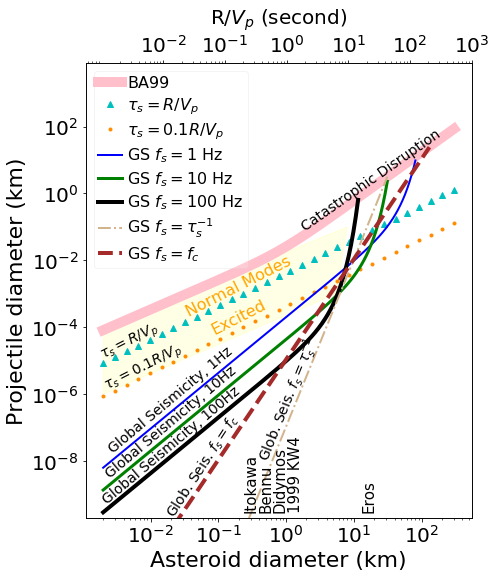

In [150]:
fig,axarr =  plt.subplots(1,1, figsize=(8,8))
plt.subplots_adjust(left=0.18, right=0.85, top=0.90, bottom=0.11) 
    
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_xlabel(r'Asteroid diameter (km)',fontsize=22)
axarr.set_ylabel(r'Projectile diameter (km)',fontsize=22)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# yellow region
coords = ([0.002,1e-6], [5.5,1e-3], [8.0,1e-1], [0.002,1e-4])
p = Polygon(coords, alpha=.1, fill=True, color='yellow')
axarr.add_artist(p)

# catastrophic disruption line
axarr.plot(Dakm_fine,diam_disrupt_km,'-',label='BA99', linewidth=10.0, color='pink')

ytxt = np.min(Dp_f100_km)
axarr.text(0.3,ytxt,'Itokawa',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.5,ytxt,'Bennu',fontsize=15,rotation=90,va='bottom',ha='center')  # vol equivalent diameters in km
axarr.text(17.0,ytxt,'Eros',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.8,ytxt,'Didymos',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(1.4,ytxt,'1999 KW4',fontsize=15,rotation=90,va='bottom',ha='center')


# a line that gives source frequency about 1 in units of R/V_p so 
# a seismic spectrum that peaks near low frequency normal modes
Dpnormal = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333
axarr.plot(Dakm_course,Dpnormal,'c^', label=r'$\tau_s=R/V_p$')
Dpnormal_small = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333*0.1
axarr.plot(Dakm_course,Dpnormal_small,'o', color='darkorange',label=r'$\tau_s=0.1R/V_p$', ms=3)

# global seismicities for different frequencies
jj = np.where(Dp_f1_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f1_km[jj],'b-',label=r'GS $f_s=1$ Hz', linewidth=2.0)
jj = np.where(Dp_f10_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f10_km[jj],'g-',label=r'GS $f_s=10$ Hz', linewidth=3.0)
jj = np.where(Dp_f100_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f100_km[jj],'k-',label=r'GS $f_s=100$ Hz', linewidth=4.0)

# global seismicity with frequencies plugged in
jj = np.where(Dp_tau_km_5 < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_tau_km_5[jj],'-.',color='tan',label=r'GS $f_s=\tau_s^{-1}$', linewidth=2.0)
#axarr.plot(Dakm,Dp_tau_km_4,'-',color='orange',label=r'f=$\tau_s$ 4', linewidth=4.0)

jj = np.where(Dp_corner_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_corner_km[jj],'--',color='brown',label=r'GS $f_s=f_c$', linewidth=4.0)

#legend
leg = axarr.legend(fontsize=16,loc="upper left",handlelength=1.5, columnspacing=0.5,handletextpad=0.3,
             borderpad=0.3,labelspacing =0.3 
             )
leg.get_frame().set_alpha(0.2)
# labelling!
axarr.text(18,2.5,'Catastrophic Disruption',rotation=35,color='black',fontsize=14,ha='center',va='center')
rot_s=40
axarr.text(0.02,7e-7,'Global Seismicity, 1Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,1.5e-7,'Global Seismicity, 10Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,3.0e-8,'Global Seismicity, 100Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(1.1,7e-7,r'Glob. Seis. $f_s=\tau_s^{-1}$',rotation=68,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.06,0.7e-8,r'Glob. Seis. $f_s=f_c$',rotation=57,color='black',fontsize=14,ha='center',va='center')
rot_t = 27
axarr.text(0.005,3.5e-5,r'$\tau_s = R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.008,6.0e-6,r'$\tau_s = 0.1 R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.2,1.7e-3,'Normal Modes',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.text(0.2,2.0e-4,'Excited',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.set_ylim((2e-10,8e3))

ax2 = axarr.twiny()
ax2.set_xscale('log')
x1,x2 = axarr.get_xlim() # limits of plot in diameter km
t1 = 0.5*x1/vp_kms  # taus for 100 m/s Vp  taus = R/Vp
t2 = 0.5*x2/vp_kms
ax2.set_xlim((t1,t2))
ax2.set_xticks([0.01, 0.1, 1, 10, 100, 1000])
ax2.set_xlabel(r'R/$V_p$ (second)',fontsize=20,labelpad=10)
plt.savefig('loglines_faster.png',dpi=300)


In [151]:
# redoing plot with bigger eta

G = 6.67e-11 # mks
rho_a = 2000.0 # kg m-3 asteroid density
rho_p = rho_a  # projectile density
vproj = 5000.0  # m/s  projectile velocity
vproj_cgs = vproj*100
vp = 100.  # m/s regolith
vp_kms = vp/1e3  # vp in km/s
eta5 = 1e-4  # seismic efficiency
#eta4 = 1e-4  # seismic efficiency
#Diameter Dp of projectile that can cause accelerations equal to surface accelerations
Q_disp = 2000.0
K_S = 0.2 *1e6   # 0.25 km^2/s  converted to m^2/s  diffusion coeff used by Richardson+05
Sparm = 1.0 # seismic amplification factor

# catastrophic disruption parameters 
Q0 = 9e7 # basalt 5kms encounter cgs  from Table III benz+99
Brho = 0.5*2.0  # cgs, from Table III benz+99 (note second number is rho!)
aexp = -0.36; bexp=1.36  #exponents

minDa = 2.0  # asteroid  mininum diameter in m
maxDa = 300.0e3 # max
Da_fine = np.logspace(np.log10(minDa), np.log10(maxDa),301,base=10)  # asteroid diameter in m
Da_course = np.logspace(np.log10(minDa), np.log10(maxDa),31,base=10)  # asteroid diameter in m

Dakm_fine = Da_fine/1e3  # in km
Dacm_fine = Da_fine*100  # in cm
Dakm_course = Da_course/1e3  # in km

#Vp = 0.1 # km/s is the same as 100 m/s which is a slow p regolith moon velocity

# global seismicity
# these are equation 7 by Richardson+05
# exponential is equation 15 Richardson+05 but with a factor of 3 to correct it
scalefac = 2.0*np.pi/(K_S*np.pi**2*Q_disp*3)
freq = 1.0 # Hz
Dp_f1_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3  # now in km
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f1_km *= expfac

freq = 10.0 # Hz
Dp_f10_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f10_km *= expfac
          
freq = 100.0 # Hz
Dp_f100_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f100_km *= expfac

#  replacing f with tau_s and our scaling we get this
Dp_tau_km_5 = 0.7*rho_a**2*G*G*eta5**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3  # times S**1.3333
Dp_tau_km_4 = 0.7*rho_a**2*G*G*eta4**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3

# replacing f with corner frequency
Dp_corner_km = G*rho_a*Da_fine**3/(vproj*vp) * np.sqrt(1.6667/eta5)/1e3

# catastrophic disruption
rcm = Dacm_fine/2.0 # radius rcm in cm of asteroid
QDstar = Q0*(rcm)**aexp + Brho*(rcm)**bexp # equation 6 by benz+asphaug99 with coefficients in Table III
# taking 5kms basalt line
# units erg/g  is the same as (cm/s)^2
massratio = QDstar/vproj_cgs**2   # v_proj = 5kms in cgs, ignoring density ratio
diamratio = massratio**(1.0/3.0)
diam_disrupt_cm = diamratio*2*rcm
diam_disrupt_km = diam_disrupt_cm/1e5



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


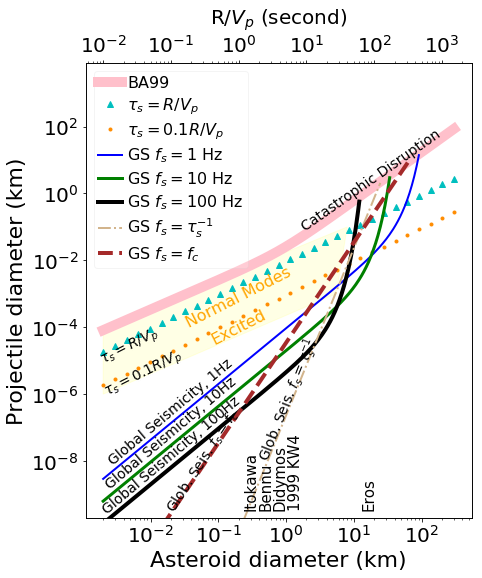

In [159]:
fig,axarr =  plt.subplots(1,1, figsize=(8,8))
plt.subplots_adjust(left=0.18, right=0.85, top=0.90, bottom=0.11) 
    
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_xlabel(r'Asteroid diameter (km)',fontsize=22)
axarr.set_ylabel(r'Projectile diameter (km)',fontsize=22)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# yellow region
coords = ([0.002,1e-6], [5.5,1e-3], [8.0,1e-1], [0.002,1e-4])
p = Polygon(coords, alpha=.1, fill=True, color='yellow')
axarr.add_artist(p)

# catastrophic disruption line
axarr.plot(Dakm_fine,diam_disrupt_km,'-',label='BA99', linewidth=10.0, color='pink')

ytxt = np.min(Dp_f100_km+2e-10)
axarr.text(0.3,ytxt,'Itokawa',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.5,ytxt,'Bennu',fontsize=15,rotation=90,va='bottom',ha='center')  # vol equivalent diameters in km
axarr.text(17.0,ytxt,'Eros',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(0.8,ytxt,'Didymos',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(1.4,ytxt,'1999 KW4',fontsize=15,rotation=90,va='bottom',ha='center')


# a line that gives source frequency about 1 in units of R/V_p so 
# a seismic spectrum that peaks near low frequency normal modes
Dpnormal = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333
axarr.plot(Dakm_course,Dpnormal,'c^', label=r'$\tau_s=R/V_p$')
Dpnormal_small = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333*0.1
axarr.plot(Dakm_course,Dpnormal_small,'o', color='darkorange',label=r'$\tau_s=0.1R/V_p$', ms=3)

# global seismicities for different frequencies
jj = np.where(Dp_f1_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f1_km[jj],'b-',label=r'GS $f_s=1$ Hz', linewidth=2.0)
jj = np.where(Dp_f10_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f10_km[jj],'g-',label=r'GS $f_s=10$ Hz', linewidth=3.0)
jj = np.where(Dp_f100_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f100_km[jj],'k-',label=r'GS $f_s=100$ Hz', linewidth=4.0)

# global seismicity with frequencies plugged in
jj = np.where(Dp_tau_km_5 < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_tau_km_5[jj],'-.',color='tan',label=r'GS $f_s=\tau_s^{-1}$', linewidth=2.0)
#axarr.plot(Dakm,Dp_tau_km_4,'-',color='orange',label=r'f=$\tau_s$ 4', linewidth=4.0)

jj = np.where(Dp_corner_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_corner_km[jj],'--',color='brown',label=r'GS $f_s=f_c$', linewidth=4.0)

#legend
leg = axarr.legend(fontsize=16,loc="upper left",handlelength=1.5, columnspacing=0.5,handletextpad=0.3,
             borderpad=0.3,labelspacing =0.3 
             )
leg.get_frame().set_alpha(0.2)
# labelling!
axarr.text(18,2.5,'Catastrophic Disruption',rotation=35,color='black',fontsize=14,ha='center',va='center')
rot_s=40
axarr.text(0.02,3e-7,'Global Seismicity, 1Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,7.0e-8,'Global Seismicity, 10Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.02,1.5e-8,'Global Seismicity, 100Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(1.1,7e-7,r'Glob. Seis. $f_s=\tau_s^{-1}$',rotation=68,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.06,1.0e-8,r'Glob. Seis. $f_s=f_c$',rotation=57,color='black',fontsize=14,ha='center',va='center')
rot_t = 27
axarr.text(0.005,2.5e-5,r'$\tau_s = R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.008,4.0e-6,r'$\tau_s = 0.1 R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.2,8.0e-4,'Normal Modes',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.text(0.2,1.0e-4,'Excited',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.set_ylim((2e-10,8e3))

ax2 = axarr.twiny()
ax2.set_xscale('log')
x1,x2 = axarr.get_xlim() # limits of plot in diameter km
t1 = 0.5*x1/vp_kms  # taus for 100 m/s Vp  taus = R/Vp
t2 = 0.5*x2/vp_kms
ax2.set_xlim((t1,t2))
ax2.set_xticks([0.01, 0.1, 1, 10, 100, 1000])
ax2.set_xlabel(r'R/$V_p$ (second)',fontsize=20,labelpad=10)
plt.savefig('loglines4.png',dpi=300)


In [132]:
# changing disruption thresh for ice
G = 6.67e-11 # mks
rho_a = 1000.0 # kg m-3 asteroid density (ice!)
rho_p = rho_a  # projectile density
vproj = 500.0  # m/s  projectile velocity
vproj_cgs = vproj*100
vp = 3000.  # m/s ice!
vp_kms = vp/1e3  # vp in km/s
eta5 = 1e-4  # seismic efficiency
#eta4 = 1e-4  # seismic efficiency
#Diameter Dp of projectile that can cause accelerations equal to surface accelerations
Q_disp = 200.0
K_S = 1 *1e6   # 0.25 km^2/s  converted to m^2/s  diffusion coeff used by Richardson+05
Sparm = 1.0 # seismic amplification factor

# catastrophic disruption parameters  for ice 3kms
#Q0 = 1.6e7 # ice 3kms encounter cgs  from Table III benz+99
#Brho = 1.2*1.0  # cgs, from Table III benz+99
#aexp = -0.39; bexp=1.26  #exponents
#ice 0.5 kms
Q0 = 7e7 # ice 0.5kms encounter cgs  from Table III benz+99
Brho = 2.1*1.0  # cgs, from Table III benz+99
aexp = -0.45; bexp=1.19  #exponents

minDa = 90.0  # asteroid  mininum diameter in m
maxDa = 1000.0e3 # max
Da_fine = np.logspace(np.log10(minDa), np.log10(maxDa),301,base=10)  # asteroid diameter in m
Da_course = np.logspace(np.log10(minDa), np.log10(maxDa),31,base=10)  # asteroid diameter in m

Dakm_fine = Da_fine/1e3  # in km
Dacm_fine = Da_fine*100  # in cm
Dakm_course = Da_course/1e3  # in km

#Vp = 0.1 # km/s is the same as 100 m/s which is a slow p regolith moon velocity

# global seismicity
# these are equation 7 by Richardson+05
# exponential is equation 15 Richardson+05 but with a factor of 3 to correct it
scalefac = 2.0*np.pi/(K_S*np.pi**2*Q_disp*3)

freq = 0.1 # Hz
Dp_f01_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3  # now in km
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f01_km *= expfac

freq = 1.0 # Hz
Dp_f1_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3  # now in km
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f1_km *= expfac

freq = 10.0 # Hz
Dp_f10_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f10_km *= expfac
          
freq = 100.0 # Hz
Dp_f100_km = (G**2*rho_a**3*Da_fine**5/(9.0*eta5*rho_p*vproj**2*freq**2))**(1.0/3.0)/1e3
expfac = np.exp(scalefac*freq*Da_fine**2)
Dp_f100_km *= expfac

#  replacing f with tau_s and our scaling we get this
Dp_tau_km_5 = 0.7*rho_a**2*G*G*eta5**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3  # times S**1.3333
Dp_tau_km_4 = 0.7*rho_a**2*G*G*eta4**-1.6667*Da_fine**5/(vproj**2*vp**2)/1e3

# replacing f with corner frequency
Dp_corner_km = G*rho_a*Da_fine**3/(vproj*vp) * np.sqrt(1.6667/eta5)/1e3

# catastrophic disruption
rcm = Dacm_fine/2.0 # radius rcm in cm of asteroid
QDstar = Q0*(rcm)**aexp + Brho*(rcm)**bexp # equation 6 by benz+asphaug99 with coefficients in Table III
# taking 5kms basalt line
# units erg/g  is the same as (cm/s)^2
massratio = QDstar/vproj_cgs**2   # v_proj =  cgs, ignoring density ratio
diamratio = massratio**(1.0/3.0)
diam_disrupt_cm = diamratio*2*rcm
diam_disrupt_km = diam_disrupt_cm/1e5



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in exp


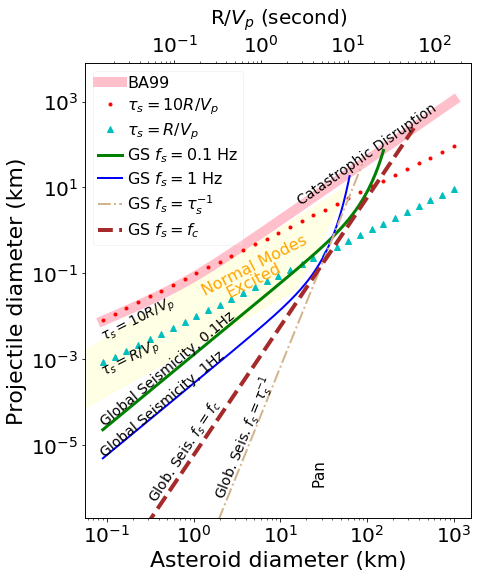

In [142]:
fig,axarr =  plt.subplots(1,1, figsize=(8,8))
plt.subplots_adjust(left=0.18, right=0.85, top=0.90, bottom=0.11) 
    
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_xlabel(r'Asteroid diameter (km)',fontsize=22)
axarr.set_ylabel(r'Projectile diameter (km)',fontsize=22)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# yellow region
coords = ([0.04,5e-5], [1.5e1,4e-2], [65.0,1.2e1], [0.04,1e-3])
p = Polygon(coords, alpha=.1, fill=True, color='yellow')
axarr.add_artist(p)

# catastrophic disruption line
axarr.plot(Dakm_fine,diam_disrupt_km,'-',label='BA99', linewidth=10.0, color='pink')

ytxt = np.min(Dp_f10_km)
#axarr.text(0.3,ytxt,'Itokawa',fontsize=15,rotation=90,va='bottom',ha='center')
#axarr.text(0.5,ytxt,'Bennu',fontsize=15,rotation=90,va='bottom',ha='center')  # vol equivalent diameters in km
#axarr.text(17.0,ytxt,'Eros',fontsize=15,rotation=90,va='bottom',ha='center')
axarr.text(28.0,ytxt,'Pan',fontsize=15,rotation=90,va='bottom',ha='center')

# a line that gives source frequency about 1 in units of R/V_p so 
# a seismic spectrum that peaks near low frequency normal modes
Dpnormal_large = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333*10
axarr.plot(Dakm_course,Dpnormal_large,'r.', label=r'$\tau_s=10 R/V_p$')
Dpnormal = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333
axarr.plot(Dakm_course,Dpnormal,'c^', label=r'$\tau_s=R/V_p$')
Dpnormal_small = 0.2*eta5**(0.33333)*Dakm_course*Sparm**(-0.666667)*(rho_a/rho_p)**0.33333*0.1
#axarr.plot(Dakm_course,Dpnormal_small,'o', color='darkorange',label=r'$\tau_s=0.1R/V_p$', ms=3)

# global seismicities for different frequencies
jj = np.where(Dp_f01_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f01_km[jj],'g-',label=r'GS $f_s=0.1$ Hz', linewidth=3.0)
jj = np.where(Dp_f1_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_f1_km[jj],'b-',label=r'GS $f_s=1$ Hz', linewidth=2.0)
jj = np.where(Dp_f10_km < diam_disrupt_km)
#axarr.plot(Dakm_fine[jj],Dp_f10_km[jj],'g-',label=r'GS $f_s=10$ Hz', linewidth=3.0)
jj = np.where(Dp_f100_km < diam_disrupt_km)
#axarr.plot(Dakm_fine[jj],Dp_f100_km[jj],'k-',label='GS f_s=100 Hz', linewidth=4.0)

# global seismicity with frequencies plugged in
jj = np.where(Dp_tau_km_5 < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_tau_km_5[jj],'-.',color='tan',label=r'GS $f_s=\tau_s^{-1}$', linewidth=2.0)
#axarr.plot(Dakm,Dp_tau_km_4,'-',color='orange',label=r'f=$\tau_s$ 4', linewidth=4.0)

jj = np.where(Dp_corner_km < diam_disrupt_km)
axarr.plot(Dakm_fine[jj],Dp_corner_km[jj],'--',color='brown',label=r'GS $f_s=f_c$', linewidth=4.0)

#legend
leg = axarr.legend(fontsize=16,loc="upper left",handlelength=1.5, columnspacing=0.5,handletextpad=0.3,
             borderpad=0.3,labelspacing =0.3 
             )
leg.get_frame().set_alpha(0.2)
# labelling!
axarr.text(100,60,'Catastrophic Disruption',rotation=35,color='black',fontsize=14,ha='center',va='center')
rot_s=40
axarr.text(0.08,9e-5,'Global Seismicity, 1Hz',rotation=rot_s,color='black',fontsize=14,ha='left',va='center')
axarr.text(0.08,6e-4,'Global Seismicity, 0.1Hz',rotation=rot_s,color='black',fontsize=14,ha='left',va='center')
#axarr.text(0.02,1.5e-7,'Global Seismicity, 10Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
#axarr.text(0.02,3.0e-8,'Global Seismicity, 100Hz',rotation=rot_s,color='black',fontsize=14,ha='center',va='center')
axarr.text(3.9,1.5e-5,r'Glob. Seis. $f_s=\tau_s^{-1}$',rotation=68,color='black',fontsize=14,ha='center',va='center')
axarr.text(0.8,0.7e-5,r'Glob. Seis. $f_s=f_c$',rotation=57,color='black',fontsize=14,ha='center',va='center')
rot_t = 27
axarr.text(0.08,8.0e-3,r'$\tau_s = 10R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='left',va='center')
axarr.text(0.08,1.0e-3,r'$\tau_s = R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='left',va='center')
#axarr.text(0.08,1.0e-4,r'$\tau_s = 0.1 R/V_p$',rotation=rot_t,color='black',fontsize=14,ha='left',va='center')
axarr.text(5,1.5e-1,'Normal Modes',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.text(5,7.0e-2,'Excited',rotation=27,color='orange',fontsize=16,ha='center',va='center')
axarr.set_ylim((2e-7,8e3))

ax2 = axarr.twiny()
ax2.set_xscale('log')
x1,x2 = axarr.get_xlim() # limits of plot in diameter km
t1 = 0.5*x1/vp_kms  
t2 = 0.5*x2/vp_kms
ax2.set_xlim((t1,t2))
ax2.set_xticks([ 0.1, 1, 10, 100])
ax2.set_xlabel(r'R/$V_p$ (second)',fontsize=20,labelpad=10)
plt.savefig('loglines5_ice.png',dpi=300)


In [28]:
# what is angular momentum of encounter?
# we want I omega versus  m_proj V_proj R 
# take I of order M R^2 
# ratio is (m_proj/M) V_proj/(R omega) ~ (m_proj/M) V_proj/Vgrav
Vgrav = 0.145 #m/s
Vproj = 5e3 
massratio = 130.0**-3
angratio = massratio*Vproj/Vgrav
print(angratio)
# encounter can only at most give less than 1% change in angular momentum


0.015695383987569256
